In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import random

In [2]:
data_path = '../../data/agg_unigram/'

In [3]:
fandom_list = [i for i in os.listdir(data_path) if 'tsv' in i]

In [4]:
fandom_list

['arthurian_mythology_&_related_fandoms_agg_cos.tsv',
 'attack_on_titan_agg_cos.tsv',
 'bishoujo_senshi_sailor_moon_agg_cos.tsv',
 'buffy_the_vampire_slayer_agg_cos.tsv',
 'dcu_agg_cos.tsv',
 'doctor_who_&_related_fandoms_agg_cos.tsv',
 'dragon_age_all_media_types_agg_cos.tsv',
 'haikyuu_agg_cos.tsv',
 'hamilton_miranda_agg_cos.tsv',
 'harry_potter_agg_cos.tsv',
 'hetalia_axis_powers_agg_cos.tsv',
 'homestuck_agg_cos.tsv',
 'kuroko_no_basuke_agg_cos.tsv',
 'les_miserables_all_media_types_agg_cos.tsv',
 'marvel_agg_cos.tsv',
 'ms_paint_adventures_agg_cos.tsv',
 'naruto_agg_cos.tsv',
 'one_direction_agg_cos.tsv',
 'shakespare_william_works_agg_cos.tsv',
 'sherlock_holmes_&_related_fandoms_agg_cos.tsv',
 'star_wars_all_media_types_agg_cos.tsv',
 'supernatural_agg_cos.tsv',
 'the_avengers_all_media_types_agg_cos.tsv',
 'the_walking_dead_&_related_fandoms_agg_cos.tsv',
 'tolkien_j_r_r_works_&_related_fandoms_agg_cos.tsv']

In [5]:
df = pd.read_csv(os.path.join(data_path, fandom_list[0]), sep = '\t')

In [6]:
df.head(2)

,Author,Hits,Kudos,Title,Words,Bookmarks,CompleteDate,Chapters,UpdateDate,PublishDate,Comments,completed_in_days,Cos
0,CaptainJacq,10372.0,279.0,Graphite Rain: A Love Story in Twelve Parts,144443.0,1188,1547.0,144,NaN,1547,66,0.0,0.016928
1,Afterstory,352.0,15.0,All the King\'s Virtues,49627.0,56,NaN,64,461.0,634,6,NaN,0.016305


In [7]:
d = dict(zip(df.Cos, df.Kudos))

In [8]:
x = [i for i in sorted(d.keys())]
y = [d[i] for i in sorted(d.keys())]

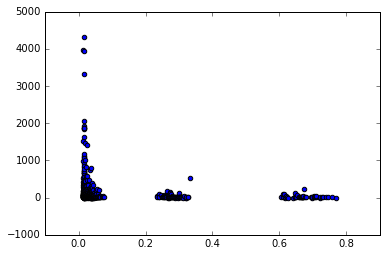

In [9]:
plt.scatter(x, y)

In [10]:
def bootstrap_resample(li):
    if len(li) > 0:
        ave_original = np.average(li)
        aves = []
        for i in range(1000):
            sample = []
            for i in range(len(li)):
                sample.append(random.choice(li))
            aves.append(np.average(sample))
        tail = sorted(aves)[24]
        head = sorted(aves)[975]
        return (ave_original, tail, head)

In [11]:
def create_normed_dfs(df):
    
    # Normalize effects of authors by turning kudos into z-score corresponding to works from this author
    # Seems not useful b/c many authors only have 1 work
#     author_list = df.Author.drop_duplicates().tolist()
#     combined = []
#     for author in author_list:
#         df_a = df[df.Author == author]
#         if len(df_a) > 1:
#             df_a['Kudos'] = (df_a['Kudos'] - df_a['Kudos'].mean())/df_a['Kudos'].std(ddof=0)
#             combined.append(df_a)        
#     df = pd.concat(combined)
#     df = df[df.Kudos != 0]

# #     Normalize by creating hits/kudos 
#     df = df[df.Hits != 0]
#     df = df[df.Kudos != 0]
#     df['Kudos/Hits'] = df['Kudos'].astype(float)/df['Hits'].astype(float)
    
#     Normalize by log scale
    df = df[df.Kudos != 0]
    df['Kudos'] = np.log(df['Kudos'])
    df = df[df.Hits != 0]
    df['Hits'] = np.log(df['Hits'])
    df['Kudos/Hits'] = df['Kudos'] - df['Hits']
    
#     df = df[df['Cos'] != 0]
#     df['Cos'] = np.log(df['Cos'])

#     # filter 0s
# #     df = df.fillna(0)"

#     # turn into z scores
#     df['Cos'] = df['Cos'].astype(float)
#     df['Cos'] = (df['Cos'] - df['Cos'].mean())/df['Cos'].std(ddof=0)

    return df

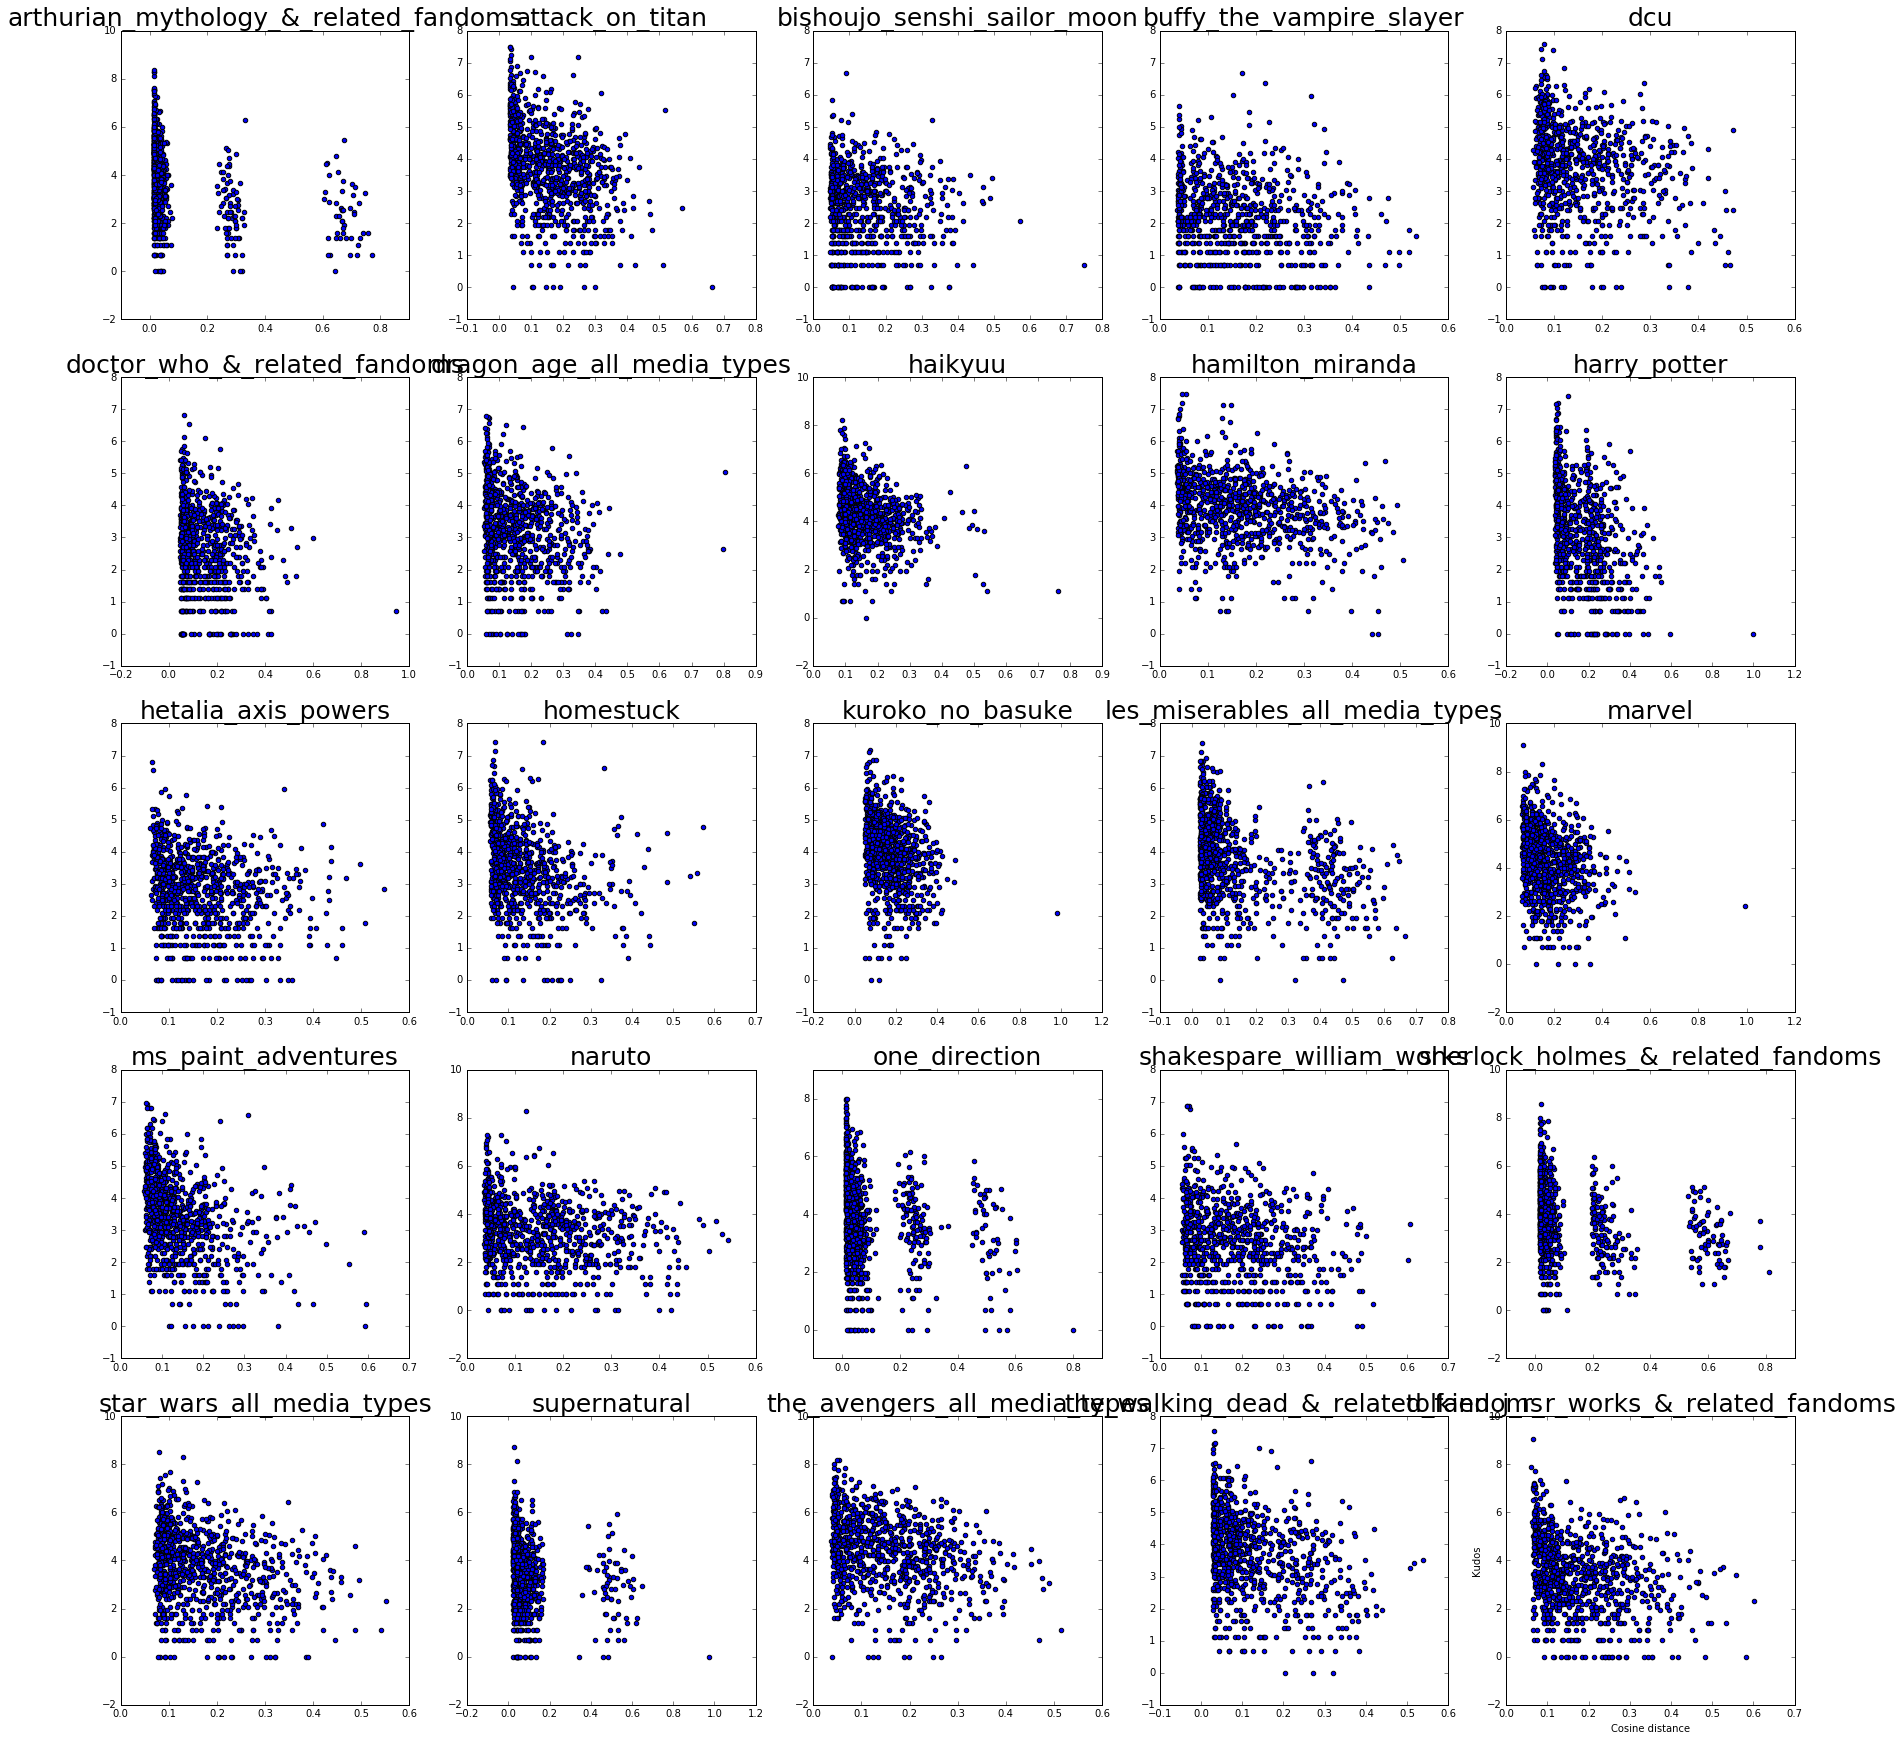

In [12]:
fig, axs = plt.subplots(5,5, figsize=(30, 30))
for idx, fandom in enumerate(fandom_list):
    axs = axs.ravel()
    df = pd.read_csv(os.path.join(data_path,fandom), sep = '\t')
#     df = create_normed_dfs(df) 
#     label = sorted(di.keys())
    x = df['Cos']
    y = np.log(df['Kudos'])

#     fig.add_subplot(5, 5, idx+1)
#     axs[idx].scatter(x,  y)
    axs[idx].scatter(x,y)#,gridsize=15, cmap='Blues')
    axs[idx].set_title(fandom.replace('_agg_cos.tsv', ''), fontsize=25)

plt.xlabel('Cosine distance')
plt.ylabel('Kudos')
plt.savefig('cos_log_kudos_scatter.png', format='png')


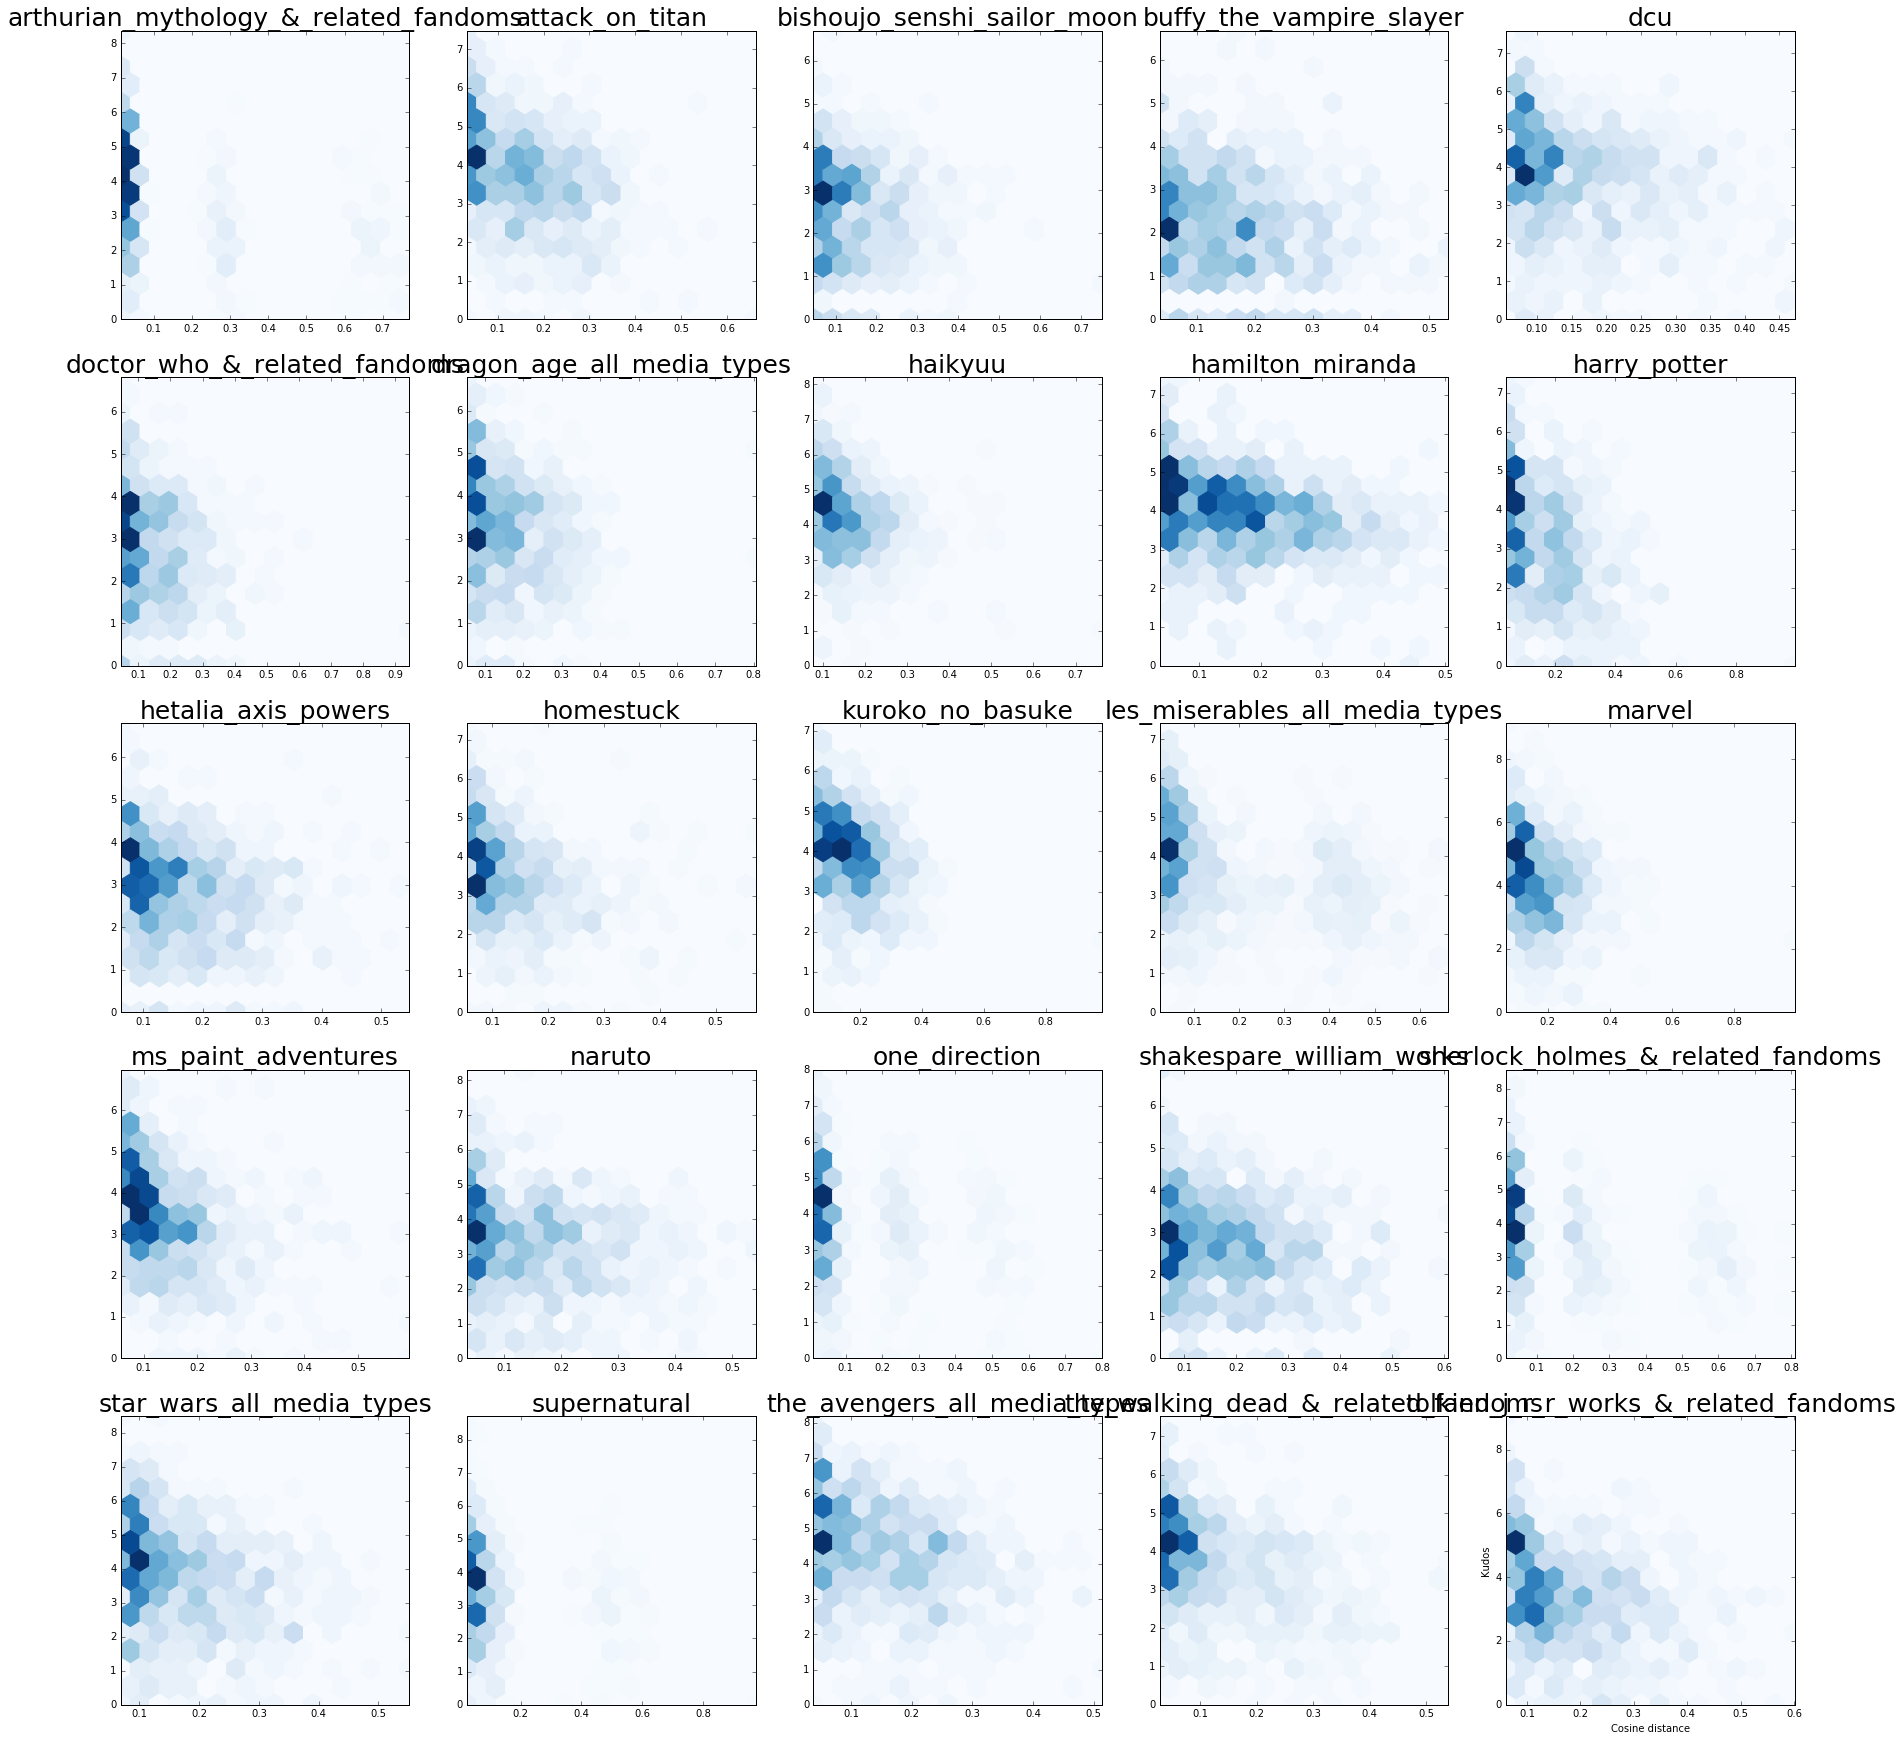

In [13]:
fig, axs = plt.subplots(5,5, figsize=(30, 30))
for idx, fandom in enumerate(fandom_list):
    axs = axs.ravel()
    df = pd.read_csv(os.path.join(data_path,fandom), sep = '\t')
#     df = create_normed_dfs(df) 
#     label = sorted(di.keys())
    x = df['Cos']
    y = np.log(df['Kudos'])

#     fig.add_subplot(5, 5, idx+1)
#     axs[idx].scatter(x,  y)
    axs[idx].hexbin(x,y,gridsize=15, cmap='Blues')
    axs[idx].set_title(fandom.replace('_agg_cos.tsv', ''), fontsize=25)

plt.xlabel('Cosine distance')
plt.ylabel('Kudos')
# plt.savefig('log_cos_log_kudos_hex.png', format='png')


In [13]:
df_all = []
for fandom in fandom_list:
    df = pd.read_csv(os.path.join(data_path,fandom), sep = '\t')
    df = create_normed_dfs(df) 
    df_all.append(df)
df_all = pd.concat(df_all)

In [14]:
import seaborn as sns

ZeroDivisionError: float division by zero

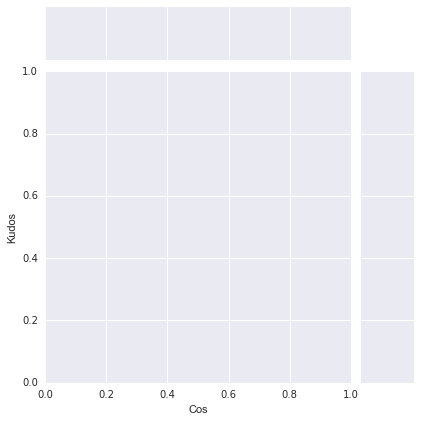

In [47]:
sns.jointplot(np.log(df_all['Cos']), df_all['Kudos'], kind="hex", gridsize=20)
plt.savefig('cos_kudos_hex_agg.png', format='png')